In [1]:
#### Cycle=1 Intraday

[*********************100%***********************]  1 of 1 completed


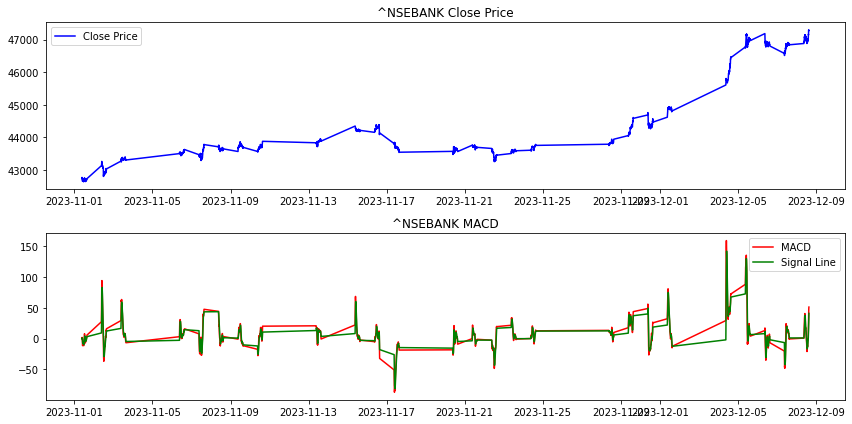

OHLC Data and MACD Values:
                                   Open          High           Low  \
Datetime                                                              
2023-12-08 15:05:00+05:30  47275.449219  47296.500000  47252.648438   
2023-12-08 15:10:00+05:30  47294.898438  47301.148438  47248.050781   
2023-12-08 15:15:00+05:30  47284.449219  47287.949219  47252.148438   
2023-12-08 15:20:00+05:30  47273.300781  47291.898438  47256.101562   
2023-12-08 15:25:00+05:30  47287.000000  47301.050781  47279.648438   

                                  Close       MACD  Signal Line  
Datetime                                                         
2023-12-08 15:05:00+05:30  47293.199219  40.065490    22.778814  
2023-12-08 15:10:00+05:30  47287.648438  45.382149    28.429647  
2023-12-08 15:15:00+05:30  47272.398438  48.143414    33.358089  
2023-12-08 15:20:00+05:30  47285.101562  50.329712    37.600995  
2023-12-08 15:25:00+05:30  47283.750000  51.309478    41.028116  


In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

ticker_symbol = '^NSEBANK'  
start_date = '2023-11-01'
end_date = '2023-12-10'
interval = '5m'  # 5-minute interval

stock_data = yf.download(ticker_symbol, start=start_date, end=end_date, interval=interval)
ohlc_data = stock_data[['Open', 'High', 'Low', 'Close']]

short_ema = ohlc_data['Close'].ewm(span=13, min_periods=0, adjust=False).mean()
long_ema = ohlc_data['Close'].ewm(span=21, min_periods=0, adjust=False).mean()

macd = short_ema - long_ema
signal_line = macd.ewm(span=7, min_periods=0, adjust=False).mean()

ohlc_data['MACD'] = macd
ohlc_data['Signal Line'] = signal_line




plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(ohlc_data['Close'], label='Close Price', color='blue')
plt.title(f'{ticker_symbol} Close Price')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(macd, label='MACD', color='red')
plt.plot(signal_line, label='Signal Line', color='green')
plt.title(f'{ticker_symbol} MACD')
plt.legend()

plt.tight_layout()
plt.show()

print("OHLC Data and MACD Values:")
print(ohlc_data.tail())

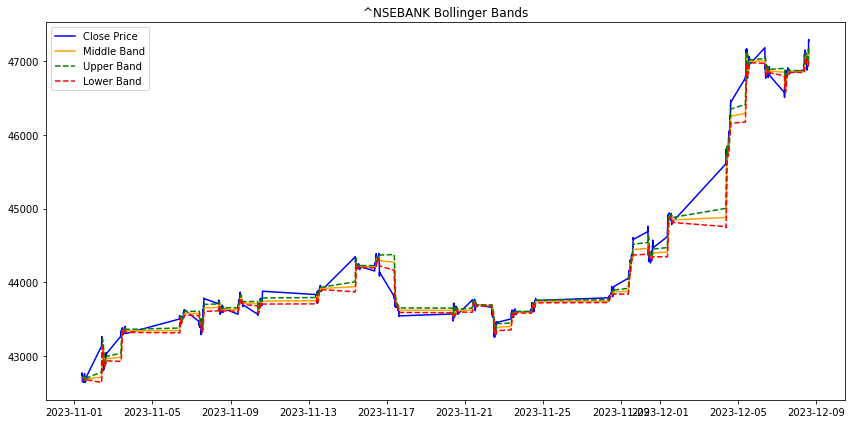

OHLC Data and Bollinger Bands Values:
                                   Open          High           Low  \
Datetime                                                              
2023-12-08 15:05:00+05:30  47275.449219  47296.500000  47252.648438   
2023-12-08 15:10:00+05:30  47294.898438  47301.148438  47248.050781   
2023-12-08 15:15:00+05:30  47284.449219  47287.949219  47252.148438   
2023-12-08 15:20:00+05:30  47273.300781  47291.898438  47256.101562   
2023-12-08 15:25:00+05:30  47287.000000  47301.050781  47279.648438   

                                  Close       MACD  Signal Line   Middle Band  \
Datetime                                                                        
2023-12-08 15:05:00+05:30  47293.199219  40.065490    22.778814  47041.157031   
2023-12-08 15:10:00+05:30  47287.648438  45.382149    28.429647  47055.164453   
2023-12-08 15:15:00+05:30  47272.398438  48.143414    33.358089  47070.701953   
2023-12-08 15:20:00+05:30  47285.101562  50.329712    37.60

In [3]:
# parameters for Bollinger Bands
window = 20  # Window for calculating moving average
num_std = 0.7  # Number of standard deviations for the bands

# Calculate the rolling mean and standard deviation
ohlc_data['Middle Band'] = ohlc_data['Close'].rolling(window=window).mean()
ohlc_data['Upper Band'] = ohlc_data['Middle Band'] + (ohlc_data['Close'].rolling(window=window).std() * num_std)
ohlc_data['Lower Band'] = ohlc_data['Middle Band'] - (ohlc_data['Close'].rolling(window=window).std() * num_std)

plt.figure(figsize=(12, 6))

plt.plot(ohlc_data['Close'], label='Close Price', color='blue')
plt.plot(ohlc_data['Middle Band'], label='Middle Band', color='orange')
plt.plot(ohlc_data['Upper Band'], label='Upper Band', color='green', linestyle='--')
plt.plot(ohlc_data['Lower Band'], label='Lower Band', color='red', linestyle='--')

plt.title(f'{ticker_symbol} Bollinger Bands')
plt.legend()
plt.tight_layout()
plt.show()

print("OHLC Data and Bollinger Bands Values:")
print(ohlc_data.tail())


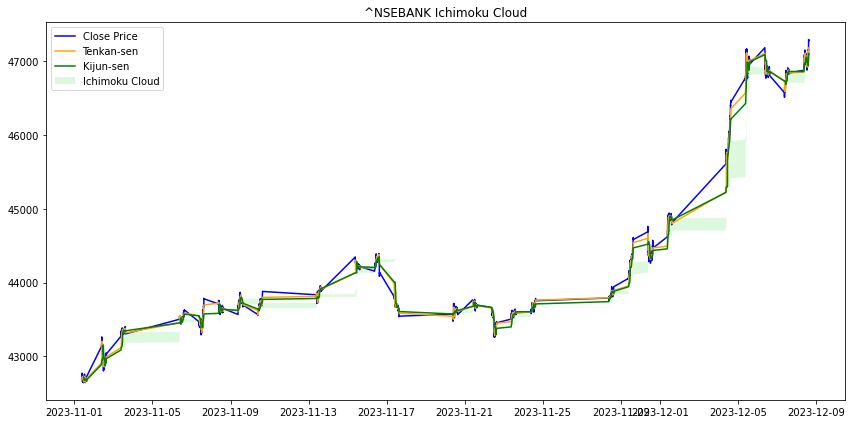

OHLC Data and Ichimoku Cloud Values:
                                   Open          High           Low  \
Datetime                                                              
2023-12-08 15:05:00+05:30  47275.449219  47296.500000  47252.648438   
2023-12-08 15:10:00+05:30  47294.898438  47301.148438  47248.050781   
2023-12-08 15:15:00+05:30  47284.449219  47287.949219  47252.148438   
2023-12-08 15:20:00+05:30  47273.300781  47291.898438  47256.101562   
2023-12-08 15:25:00+05:30  47287.000000  47301.050781  47279.648438   

                                  Close       MACD  Signal Line   Middle Band  \
Datetime                                                                        
2023-12-08 15:05:00+05:30  47293.199219  40.065490    22.778814  47041.157031   
2023-12-08 15:10:00+05:30  47287.648438  45.382149    28.429647  47055.164453   
2023-12-08 15:15:00+05:30  47272.398438  48.143414    33.358089  47070.701953   
2023-12-08 15:20:00+05:30  47285.101562  50.329712    37.600

In [4]:
# parameters for Ichimoku Cloud
conversion_line_period = 9
base_line_period = 26
leading_span_b_period = 52
displacement = 26

# Calculate Tenkan-sen (Conversion Line)
tenkan_sen_high = ohlc_data['High'].rolling(window=conversion_line_period).max()
tenkan_sen_low = ohlc_data['Low'].rolling(window=conversion_line_period).min()
ohlc_data['Tenkan-sen'] = (tenkan_sen_high + tenkan_sen_low) / 2

# Calculate Kijun-sen (Base Line)
kijun_sen_high = ohlc_data['High'].rolling(window=base_line_period).max()
kijun_sen_low = ohlc_data['Low'].rolling(window=base_line_period).min()
ohlc_data['Kijun-sen'] = (kijun_sen_high + kijun_sen_low) / 2

# Calculate Senkou Span A (Leading Span A)
ohlc_data['Senkou Span A'] = ((ohlc_data['Tenkan-sen'] + ohlc_data['Kijun-sen']) / 2).shift(displacement)

# Calculate Senkou Span B (Leading Span B)
senkou_span_high = ohlc_data['High'].rolling(window=leading_span_b_period).max()
senkou_span_low = ohlc_data['Low'].rolling(window=leading_span_b_period).min()
ohlc_data['Senkou Span B'] = ((senkou_span_high + senkou_span_low) / 2).shift(displacement)





plt.figure(figsize=(12, 6))

plt.plot(ohlc_data['Close'], label='Close Price', color='blue')
plt.plot(ohlc_data['Tenkan-sen'], label='Tenkan-sen', color='orange')
plt.plot(ohlc_data['Kijun-sen'], label='Kijun-sen', color='green')
plt.fill_between(ohlc_data.index, ohlc_data['Senkou Span A'], ohlc_data['Senkou Span B'], where=ohlc_data['Senkou Span A'] >= ohlc_data['Senkou Span B'], facecolor='lightgreen', interpolate=True, alpha=0.3, label='Ichimoku Cloud')

plt.title(f'{ticker_symbol} Ichimoku Cloud')
plt.legend()
plt.tight_layout()
plt.show()

print("OHLC Data and Ichimoku Cloud Values:")
print(ohlc_data.tail())


In [5]:
in_trade = False
buy_price = 0
sell_price = 0
trade_count = 0
total_profit = 0

buy_dates = []
buy_prices = []
sell_dates = []
sell_prices = []
profits = []

last_trade_date = None

# signals
for i in range(ohlc_data.shape[0]):
    row = ohlc_data.iloc[i]

    # Check if it's the last data point of the day
    if i < ohlc_data.shape[0] - 1 and row.name.date() != ohlc_data.iloc[i + 1].name.date():
        if in_trade:
            # Exit the trade at the end of the day
            sell_price = ohlc_data.iloc[i]['Close']
            profit = sell_price - buy_price
            total_profit += profit
            trade_count += 1
            sell_dates.append(row.name.date())
            sell_prices.append(sell_price)
            profits.append(profit)
            print(f"Sell at {row.name.date()} - Price: {sell_price} - Profit: {profit:.2f}")
            in_trade = False

    if not in_trade and (last_trade_date is None or last_trade_date != row.name.date()):
        # Entry conditions
        if row['Close'] > row['Upper Band'] and row['MACD'] > row['Signal Line'] and row['Tenkan-sen'] > row['Kijun-sen']:
            in_trade = True
            buy_price = row['Close']
            buy_dates.append(row.name.date())
            buy_prices.append(buy_price)
            last_trade_date = row.name.date()
            print(f"Buy at {row.name.date()} - Price: {buy_price}")
    elif in_trade:
        # Exit conditions
        if not (row['Close'] > row['Upper Band'] and row['Signal Line'] > 0 and row['Tenkan-sen'] > row['Kijun-sen']):
            sell_price = row['Close']
            profit = sell_price - buy_price
            total_profit += profit
            trade_count += 1
            sell_dates.append(row.name.date())
            sell_prices.append(sell_price)
            profits.append(profit)
            print(f"Sell at {row.name.date()} - Price: {sell_price} - Profit: {profit:.2f}")
            in_trade = False

# Ensure all lists have the same length
min_length = min(len(buy_dates), len(buy_prices), len(sell_dates), len(sell_prices), len(profits))


df_trades = pd.DataFrame({
    'Buy Date': buy_dates[:min_length],
    'Buy Price': buy_prices[:min_length],
    'Sell Date': sell_dates[:min_length],
    'Sell Price': sell_prices[:min_length],
    'Profit': profits[:min_length]
})

df_trades.to_csv('trades_output.csv', index=False)

# Calculate overall results
if trade_count > 0:
    avg_profit_per_trade = total_profit / trade_count
    print(f"\nTotal Trades: {trade_count}")
    print(f"Total Profit: {total_profit:.2f}")
    print(f"Average Profit per Trade: {avg_profit_per_trade:.2f}")
else:
    print("No trades executed based on the strategy.")

Buy at 2023-11-01 - Price: 42713.3515625
Sell at 2023-11-01 - Price: 42695.1015625 - Profit: -18.25
Buy at 2023-11-02 - Price: 43132.8515625
Sell at 2023-11-02 - Price: 43123.80078125 - Profit: -9.05
Buy at 2023-11-03 - Price: 43272.5
Sell at 2023-11-03 - Price: 43330.8984375 - Profit: 58.40
Buy at 2023-11-06 - Price: 43545.44921875
Sell at 2023-11-06 - Price: 43507.25 - Profit: -38.20
Buy at 2023-11-07 - Price: 43506.94921875
Sell at 2023-11-07 - Price: 43500.6015625 - Profit: -6.35
Buy at 2023-11-08 - Price: 43710.55078125
Sell at 2023-11-08 - Price: 43697.5 - Profit: -13.05
Buy at 2023-11-09 - Price: 43735.1484375
Sell at 2023-11-09 - Price: 43702.80078125 - Profit: -32.35
Buy at 2023-11-10 - Price: 43704.30078125
Sell at 2023-11-10 - Price: 43710.55078125 - Profit: 6.25
Buy at 2023-11-13 - Price: 43835.0
Sell at 2023-11-13 - Price: 43802.44921875 - Profit: -32.55
Buy at 2023-11-15 - Price: 44295.30078125
Sell at 2023-11-15 - Price: 44264.05078125 - Profit: -31.25
Buy at 2023-11-16 

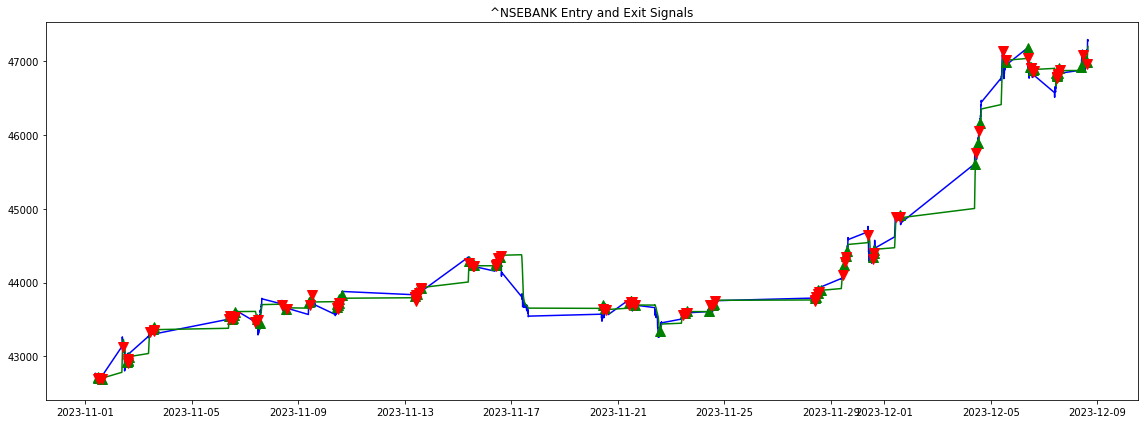

In [6]:
buy_signals = []
sell_signals = []

for index, row in ohlc_data.iterrows():
    if not in_trade:
        # Entry conditions
        if (
            row['Close'] > row['Upper Band'] and
            row['MACD'] > row['Signal Line'] and
            row['Tenkan-sen'] > row['Kijun-sen']
        ):
            in_trade = True
            buy_price = row['Close']
            buy_signals.append((index, buy_price))
    else:
        # Exit conditions
        if not (
            row['Close'] > row['Upper Band'] and
            row['MACD'] > row['Signal Line'] and
            row['Tenkan-sen'] > row['Kijun-sen']
        ):
            sell_price = row['Close']
            sell_signals.append((index, sell_price))
            in_trade = False

plt.figure(figsize=(16, 6))
plt.plot(ohlc_data.index, ohlc_data['Close'], label='Close Price', color='blue')
plt.plot(ohlc_data.index, ohlc_data['Upper Band'], label='Upper Bollinger Band', color='green')

for signal in buy_signals:
    plt.plot(signal[0], signal[1], '^', markersize=10, color='green', label='Buy Signal')

for signal in sell_signals:
    plt.plot(signal[0], signal[1], 'v', markersize=10, color='red', label='Sell Signal')

plt.title(f'{ticker_symbol} Entry and Exit Signals')

plt.tight_layout()
plt.show()


In [7]:
# Print data for buy signals
for signal in buy_signals:
    index, buy_price = signal
    signal_data = ohlc_data.loc[index]
    print(f"Buy Signal Date: {index.date()}")
    print(f"Close Price: {signal_data['Close']}")
    print(f"Upper Bollinger Band: {signal_data['Upper Band']}")
    print(f"MACD: {signal_data['MACD']}")
    print(f"Signal Line: {signal_data['Signal Line']}")
    print(f"Tenkan-sen: {signal_data['Tenkan-sen']}")
    print(f"Kijun-sen: {signal_data['Kijun-sen']}")
    print("--------------------")

# Print data for sell signals
for signal in sell_signals:
    index, sell_price = signal
    signal_data = ohlc_data.loc[index]
    print(f"Sell Signal Date: {index.date()}")
    print(f"Close Price: {signal_data['Close']}")
    print(f"Upper Bollinger Band: {signal_data['Upper Band']}")
    print(f"MACD: {signal_data['MACD']}")
    print(f"Signal Line: {signal_data['Signal Line']}")
    print(f"Tenkan-sen: {signal_data['Tenkan-sen']}")
    print(f"Kijun-sen: {signal_data['Kijun-sen']}")
    print("--------------------")


Buy Signal Date: 2023-11-01
Close Price: 42713.3515625
Upper Bollinger Band: 42700.21004870039
MACD: -2.1927282749456936
Signal Line: -5.9276591642443925
Tenkan-sen: 42681.451171875
Kijun-sen: 42678.55078125
--------------------
Buy Signal Date: 2023-11-01
Close Price: 42715.55078125
Upper Bollinger Band: 42698.041045088605
MACD: 0.1816789155054721
Signal Line: -3.5637570643430694
Tenkan-sen: 42681.451171875
Kijun-sen: 42678.55078125
--------------------
Buy Signal Date: 2023-11-01
Close Price: 42712.8515625
Upper Bollinger Band: 42691.36010594784
MACD: 0.8003233275885577
Signal Line: -1.4985027320241666
Tenkan-sen: 42670.125
Kijun-sen: 42662.875
--------------------
Buy Signal Date: 2023-11-01
Close Price: 42698.0
Upper Bollinger Band: 42695.54249677068
MACD: 1.7586532908680965
Signal Line: 0.2290555191354967
Tenkan-sen: 42678.349609375
Kijun-sen: 42666.474609375
--------------------
Buy Signal Date: 2023-11-02
Close Price: 42930.69921875
Upper Bollinger Band: 42912.76505292071
MACD: 

In [8]:
df_trades = pd.read_csv('trades_output.csv')

# Calculate metrics
if not df_trades.empty:
    # Accuracy rate
    accuracy_rate = (df_trades['Profit'] > 0).sum() / len(df_trades)

    # Performance ratios
    total_trades = len(df_trades)
    winning_trades = (df_trades['Profit'] > 0).sum()
    losing_trades = total_trades - winning_trades

    win_loss_ratio = winning_trades / max(1, losing_trades)
    profit_factor = abs(df_trades['Profit'][df_trades['Profit'] > 0].sum() / df_trades['Profit'][df_trades['Profit'] < 0].sum())
    
    print(f"\nAccuracy Rate: {accuracy_rate * 100:.2f}%")
    print(f"Total Trades: {total_trades}")
    print(f"Winning Trades: {winning_trades}")
    print(f"Losing Trades: {losing_trades}")
    print(f"Win/Loss Ratio: {win_loss_ratio:.2f}")
    print(f"Profit Factor: {profit_factor:.2f}")
else:
    print("No trades executed based on the strategy.")


Accuracy Rate: 48.00%
Total Trades: 25
Winning Trades: 12
Losing Trades: 13
Win/Loss Ratio: 0.92
Profit Factor: 1.97


In [9]:
import numpy as np

if not df_trades.empty:
    max_loss = df_trades['Profit'].min()
    max_gain = df_trades['Profit'].max()

    df_trades['Cumulative Profit'] = df_trades['Profit'].cumsum()
    df_trades['Previous Peak'] = df_trades['Cumulative Profit'].cummax()
    df_trades['Drawdown'] = df_trades['Cumulative Profit'] - df_trades['Previous Peak']
    max_drawdown = df_trades['Drawdown'].min()

    print(f"\nMax Loss: {max_loss:.2f}")
    print(f"Max Gain: {max_gain:.2f}")
    print(f"Max Drawdown: {max_drawdown:.2f}")

else:
    print("No trades executed based on the strategy.")


Max Loss: -204.40
Max Gain: 283.95
Max Drawdown: -206.95
